<a href="https://colab.research.google.com/github/nishnafinu/Supply-Chain-Management-Project/blob/main/supply_chain_management_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supply Chain Management Project 📈⌛**

##**Data Overview🔍**

The dataset includes information about warehouses, managers, regional zones, and various factors affecting the supply chain.

Problem **:** Mismatch in demand and supply, resulting in inventory costs and losses.

Goal **:** Build a model using historical data to determine the optimum weight of the product shipped from each warehouse.

 **Importing Libraries 📚**

In [73]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.style
#from warnings import filterwarnings
#filterwarnings("ignore")

**Reading Data Set 👓**

In [74]:
#read the test data
df_test = pd.read_csv("/content/drive/MyDrive/supply_test.csv")
#read the train data
df_train = pd.read_csv("/content/drive/MyDrive/supply_train.csv")

In [75]:
# Displaying the first few rows of the train dataset
df_train.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [76]:
# Displaying the first few rows of the test dataset
df_test.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071


In [77]:
#shape of the train dataset
df_train.shape

(16620, 25)

In [78]:
#shape of the test dataset
df_test.shape

(5529, 25)

In [79]:
# Displaying information about the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [80]:
# Displaying information about the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

**Initial Dataset Exploration 🔍**

In [81]:
# This section will explore raw dataset that has been imported🔍

In [82]:
df_train.flood_impacted.value_counts()

flood_impacted
0    15010
1     1610
Name: count, dtype: int64

In [83]:
df_test.flood_impacted.value_counts()

flood_impacted
0    4953
1     576
Name: count, dtype: int64

In [84]:
df_train. Location_type.value_counts()

Location_type
Rural    15272
Urban     1348
Name: count, dtype: int64

In [85]:
df_train.transport_issue_l1y.value_counts()

transport_issue_l1y
0    10094
1     3072
2     1437
3     1272
4      508
5      237
Name: count, dtype: int64

In [86]:
df_train.product_wg_ton.value_counts()

product_wg_ton
6081     19
6057     15
6107     14
5139     13
6097     13
         ..
49072     1
41122     1
40128     1
54144     1
21069     1
Name: count, Length: 4248, dtype: int64

**Data Cleaning 📑**

In [87]:
# Data cleaning for train dataset

In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [89]:
# Checking for and summing up duplicated rows in the train dataset
df_train.duplicated().sum()

0

In [90]:
# Checking for and summing up missing values in each column of the train dataset
df_train.isna().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [91]:
# Deleting unnecessary columns ('Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID') in the train dataset
df_train = df_train.drop(columns=['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID'])

In [92]:
# Filling missing values in the 'workers_num' column with the mean value of that column in the train dataset
df_train['workers_num'].fillna(value=df_train['workers_num'].mean(), inplace=True)

In [93]:
# Drop Unwanted Column in train dataset because half of the values are null values
df_train = df_train.drop(columns=['wh_est_year'])

In [94]:
# Filling missing values in the 'approved_wh_govt_certificate' column with the most recent non-null value in the train dataset
df_train['approved_wh_govt_certificate'].fillna(method='ffill', inplace=True)

☝After executing this line of codes, any missing values in the column of df_train will be filled with the mean value of that column.

**Data cleaning for test dataset**

In [95]:
# Data cleaning for test dataset

In [96]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

In [97]:
# Checking for and summing up duplicated rows in the test dataset
df_test.duplicated().sum()

0

In [98]:
# Checking for and summing up missing values in each column of the test dataset
df_test.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [99]:
# Deleting unnecessary columns ('Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID') in the test dataset
df_test = df_test.drop(columns=['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID'])

In [100]:
# Filling missing values in the 'workers_num' column with the mean value of that column in the test dataset
df_test['workers_num'].fillna(value=df_test['workers_num'].mean(), inplace=True)


In [101]:
# Drop Unwanted Column in test dataset because half of the values are null values
df_test = df_test.drop(columns=['wh_est_year'])


In [102]:
# Filling missing values in the 'approved_wh_govt_certificate' column with the most recent non-null value in the test dataset
df_test['approved_wh_govt_certificate'].fillna(method='ffill', inplace=True)

In [103]:
df_test.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [104]:
# 👉 From the above results, there are no missing/null value in this dataset

In [105]:
# value count of each column
cols = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']
for col in cols:
  values = df_train[col].value_counts()
  print(f'{col}:\n{values}')


Location_type:
Location_type
Rural    15272
Urban     1348
Name: count, dtype: int64
WH_capacity_size:
WH_capacity_size
Large    6743
Mid      6691
Small    3186
Name: count, dtype: int64
zone:
zone
North    6800
West     5320
South    4223
East      277
Name: count, dtype: int64
WH_regional_zone:
WH_regional_zone
Zone 6    5568
Zone 5    3027
Zone 4    2756
Zone 2    1998
Zone 3    1937
Zone 1    1334
Name: count, dtype: int64
wh_owner_type:
wh_owner_type
Company Owned    8975
Rented           7645
Name: count, dtype: int64
approved_wh_govt_certificate:
approved_wh_govt_certificate
C     3788
B+    3377
B     3312
A     3257
A+    2886
Name: count, dtype: int64


##**Data Preprocessing**

# Label Encoding for train dataset

In [106]:
# Import the LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder class
le = LabelEncoder()

# Encode 'Location_type' column
df_train['Location_type'] = le.fit_transform(df_train['Location_type'])

# Encode 'WH_capacity_size' column
df_train['WH_capacity_size'] = le.fit_transform(df_train['WH_capacity_size'])

# Encode 'approved_wh_govt_certificate' column
df_train['approved_wh_govt_certificate'] = le.fit_transform(df_train['approved_wh_govt_certificate'])

# Encode 'zone' column
df_train['zone'] = le.fit_transform(df_train['zone'])

# Encode 'WH_regional_zone' column
df_train['WH_regional_zone'] = le.fit_transform(df_train['WH_regional_zone'])

# Encode 'wh_owner_type' column
df_train['wh_owner_type'] = le.fit_transform(df_train['wh_owner_type'])

# Label Encoding for test dataset

In [107]:
# Import the LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Encode 'Location_type' column
df_test['Location_type'] = le.fit_transform(df_test['Location_type'])

# Encode 'WH_capacity_size' column
df_test['WH_capacity_size'] = le.fit_transform(df_test['WH_capacity_size'])

# Encode 'zone' column
df_test['zone'] = le.fit_transform(df_test['zone'])

# Encode 'WH_regional_zone' column
df_test['WH_regional_zone'] = le.fit_transform(df_test['WH_regional_zone'])

#Encode 'wh_owner_type' column
df_test['wh_owner_type'] = le.fit_transform(df_test['wh_breakdown_l3m'])

# Encode 'approved_wh_govt_certificate' column
df_test['approved_wh_govt_certificate'] = le.fit_transform(df_test['approved_wh_govt_certificate'])

#**EDA-Exploratory Data Analysis 📊**

👉 This section will explore variables in the dataset using different various plots/charts.

**Correlation matrix**

In [108]:
#print correltion matrix
correlation_matrix = df_train.corr()
print(correlation_matrix)

                              Location_type  WH_capacity_size      zone  \
Location_type                      1.000000         -0.005787 -0.009235   
WH_capacity_size                  -0.005787          1.000000  0.074961   
zone                              -0.009235          0.074961  1.000000   
WH_regional_zone                   0.006358         -0.478932 -0.057793   
num_refill_req_l3m                 0.011778         -0.001569  0.019845   
transport_issue_l1y                0.009557          0.016773 -0.008331   
Competitor_in_mkt                  0.012287          0.018835  0.142368   
retail_shop_num                   -0.003619          0.070286 -0.054551   
wh_owner_type                      0.002183         -0.002084 -0.004697   
distributor_num                   -0.007843          0.002850  0.006498   
flood_impacted                     0.012233          0.012755 -0.004135   
flood_proof                        0.010053          0.000089  0.010641   
electric_supply          

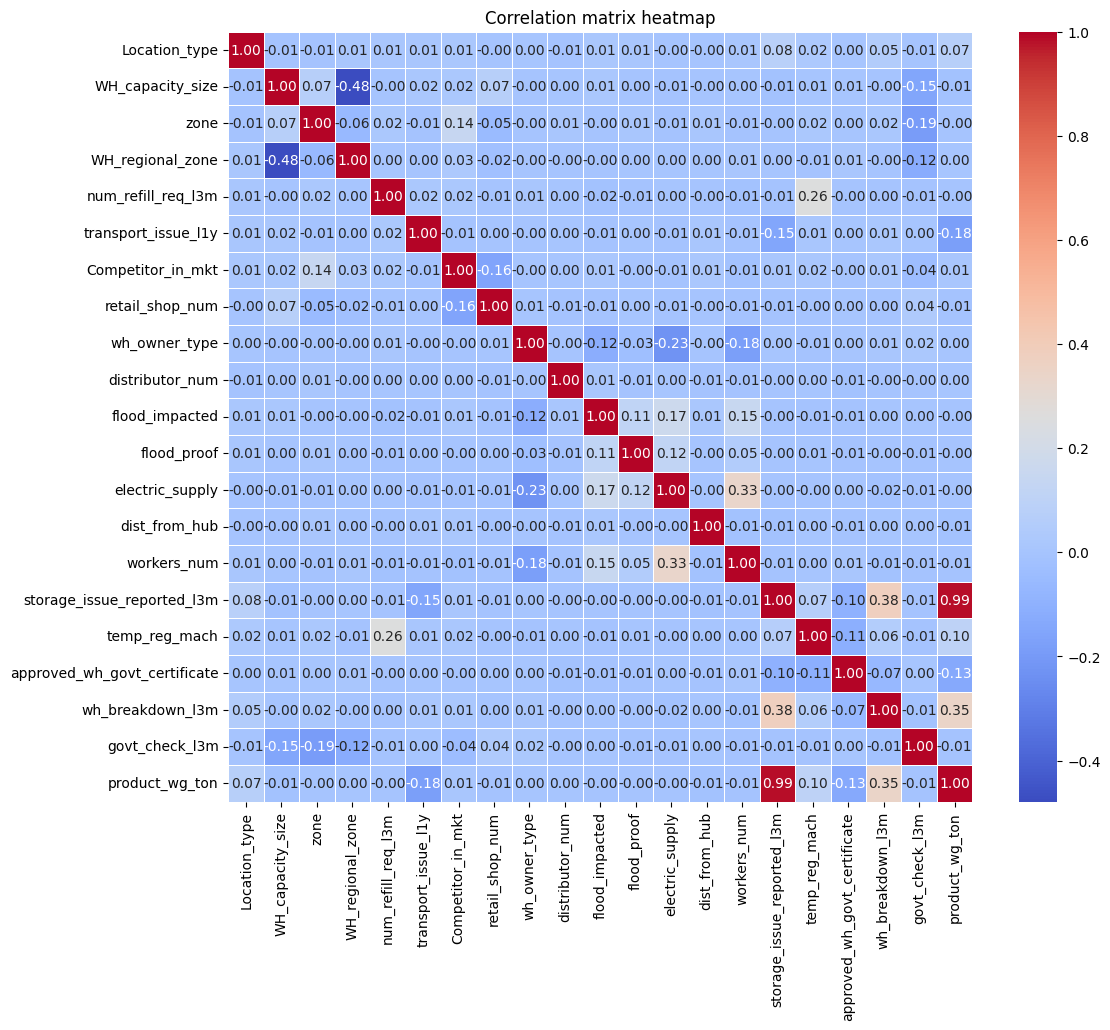

In [109]:
#plot the correlation matrix
correlation_matrix = df_train.corr()
plt.figure(figsize=(12,10)) #creates a figure with a specific size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) #generates a heatmap of the correlation matrix
plt.title('Correlation matrix heatmap')
plt.show()

☝ In the above analysis, the correlations are categorized based on their strength. The primary feature strongly correlated with product_wg_ton is storage_issue_reported_l3m with a correlation coefficient of 0.99. The relationships identified in this report provide valuable insights into potential indicators for predicting or understanding variations in product_wg_ton. It is recommended to consider these findings in the context of your specific analysis and industry knowledge for a more comprehensive interpretation.

###Data visualization

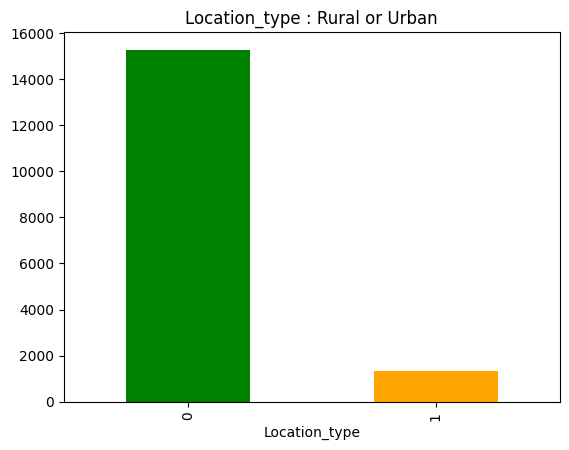

In [110]:
#plotting of location type
Location_type = df_train['Location_type'].value_counts()
Location_type.plot(kind='bar' , color = ['Green','Orange'])
plt.title('Location_type : Rural or Urban')

#show the plot
plt.show()

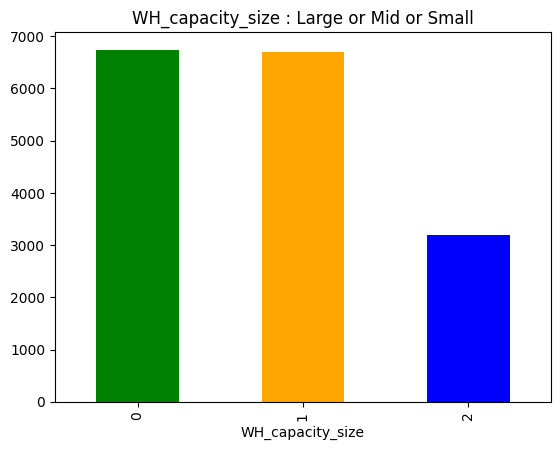

In [111]:
# WH_capacity_size distribution
WH_capacity_size = df_train['WH_capacity_size'].value_counts()
WH_capacity_size.plot(kind='bar',color=['green','orange','blue'])
plt.title('WH_capacity_size : Large or Mid or Small')
plt.show()

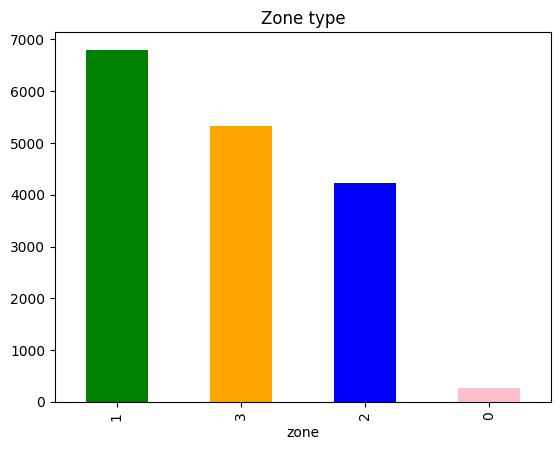

In [112]:

# Zone type distribution
zone =df_train['zone'].value_counts()
zone.plot(kind='bar',color=['green','orange','blue','pink'])
plt.title('Zone type')


plt.show()

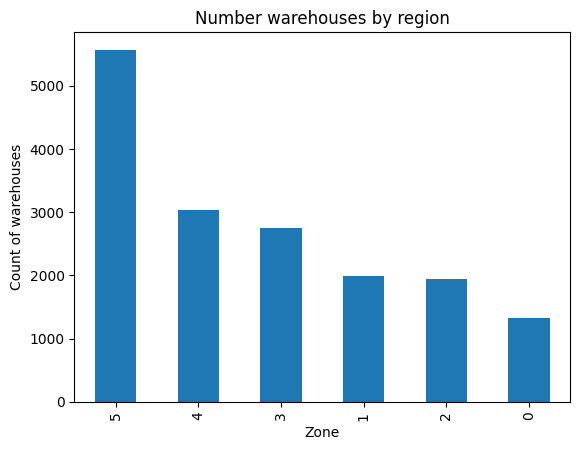

In [113]:
# Count of warehouses distribution based on region
WH_counts = df_train['WH_regional_zone'].value_counts().sort_values(ascending=False)
WH_counts.plot(kind="bar")
plt.title('Number warehouses by region')
plt.ylabel('Count of warehouses')
plt.xlabel('Zone')

plt.show()

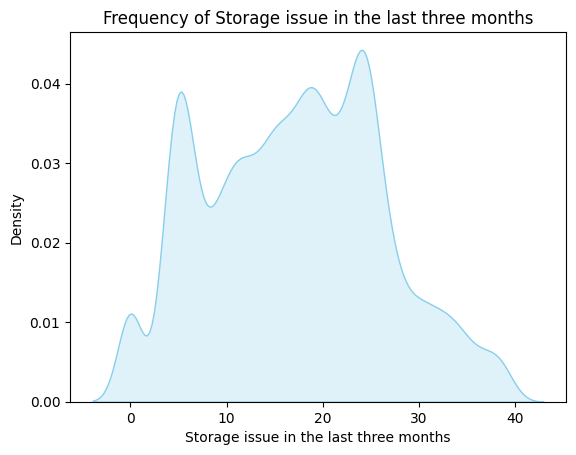

In [114]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the KDE (kernal density estimation) plot
sns.kdeplot(data=df_train, x='storage_issue_reported_l3m', fill=True, color='skyblue')
plt.xlabel('Storage issue in the last three months')
plt.ylabel('Density')
plt.title('Frequency of Storage issue in the last three months')

plt.show()

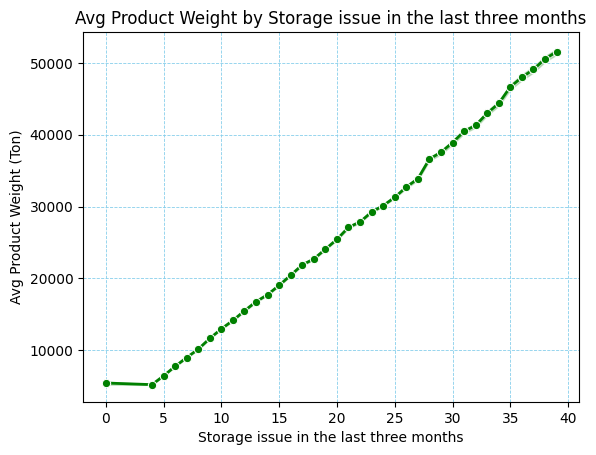

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

#line plot for visualizing the storage issue reported in the last 3months based on avg product weight
sns.lineplot(
    data=df_train, x='storage_issue_reported_l3m', y='product_wg_ton',
    color='green', marker='o', linestyle='-', linewidth=2 )

plt.xlabel('Storage issue in the last three months')
plt.ylabel('Avg Product Weight (Ton)')
plt.title('Avg Product Weight by Storage issue in the last three months')

#add gridto the line
plt.grid(linestyle='--',color='skyblue',linewidth=0.6)

plt.show()

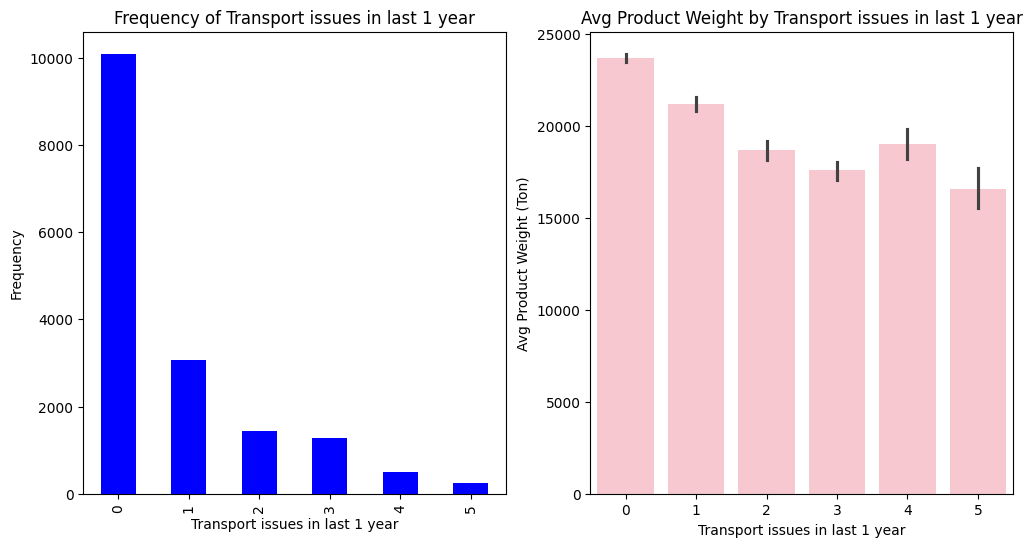

In [116]:


# to visualize the transport issue in the last year

import matplotlib.pyplot as plt
import seaborn as sns

#set the sub plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# plot-1

df=df_train['transport_issue_l1y'].value_counts().sort_index()
df.plot(kind='bar',color='blue' , ax=axes[0])
axes[0].set_xlabel('Transport issues in last 1 year')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Transport issues in last 1 year')

#plot-2

sns.barplot(data=df_train, x='transport_issue_l1y', y='product_wg_ton', color='pink',  ax=axes[1])
axes[1].set_xlabel('Transport issues in last 1 year')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Transport issues in last 1 year')


plt.show()

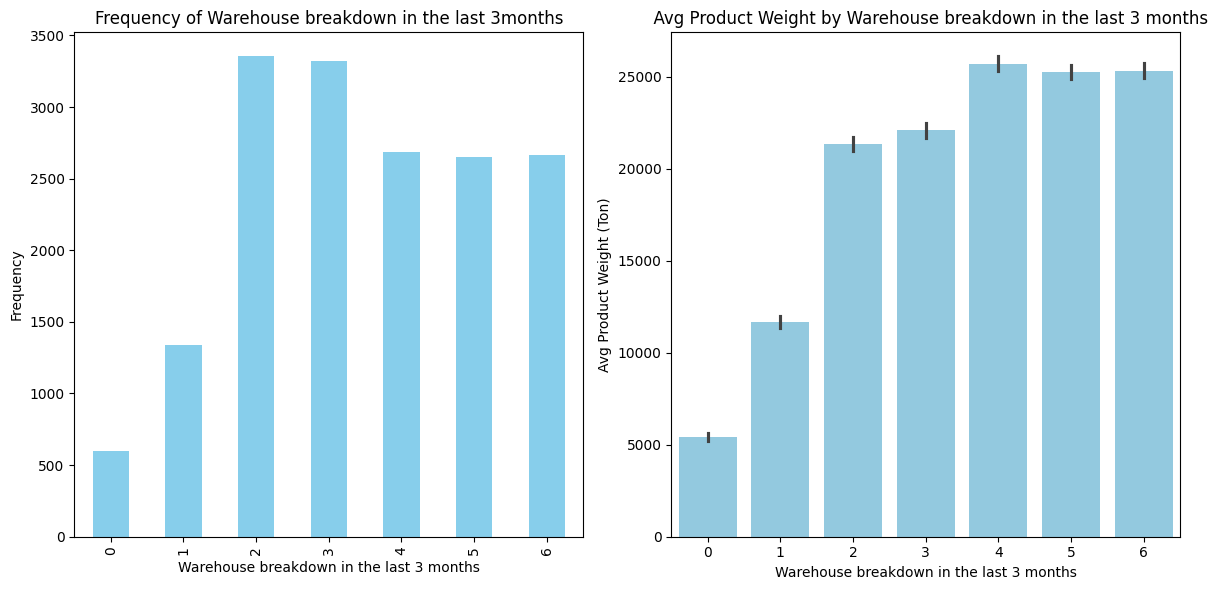

In [117]:
# visualize the frequency of warehouse breakdowns in the last 3 months

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first bar chart
df=df_train['wh_breakdown_l3m'].value_counts().sort_index()
df.plot(kind='bar', ax=axes[0], color='skyblue', linewidth=1.2)

axes[0].set_xlabel('Warehouse breakdown in the last 3 months')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Warehouse breakdown in the last 3months')

# Plot the second bar chart
sns.barplot(data=df_train, x='wh_breakdown_l3m', y='product_wg_ton', color='skyblue', ax=axes[1] ,linewidth=1.5)
axes[1].set_xlabel('Warehouse breakdown in the last 3 months')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('  Avg Product Weight by Warehouse breakdown in the last 3 months')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

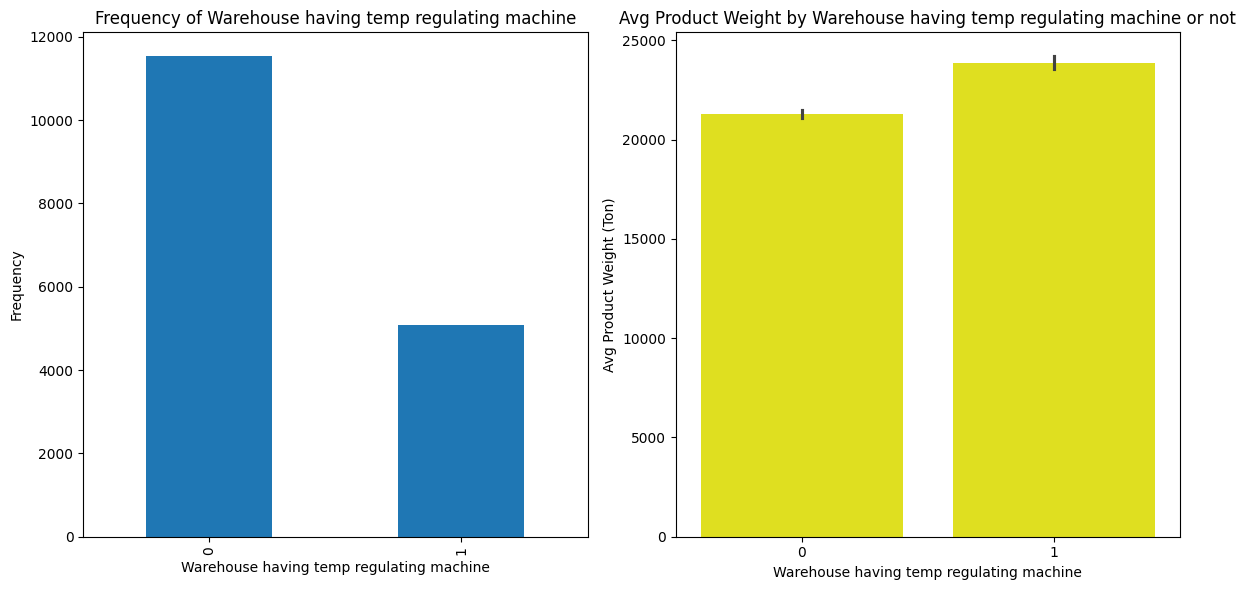

In [118]:
# visualization to analyze the presence of temperature regulating machines in warehousesand its relationship with the average product weight
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first bar chart
df=df_train['temp_reg_mach'].value_counts().sort_index()
df.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Warehouse having temp regulating machine')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Warehouse having temp regulating machine')

# Plotting the second bar chart
sns.barplot(data=df_train, x='temp_reg_mach', y='product_wg_ton', color='yellow', ax=axes[1])
axes[1].set_xlabel('Warehouse having temp regulating machine')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Warehouse having temp regulating machine or not')

# Adjust layout for better visualization
plt.tight_layout()
# Show the plot
plt.show()


Feature Engineering

In the below code for The first pie chart visualizes the distribution of warehouse frequency by location type (Rural vs. Urban), while the second pie chart visualizes the average product weight by location type.

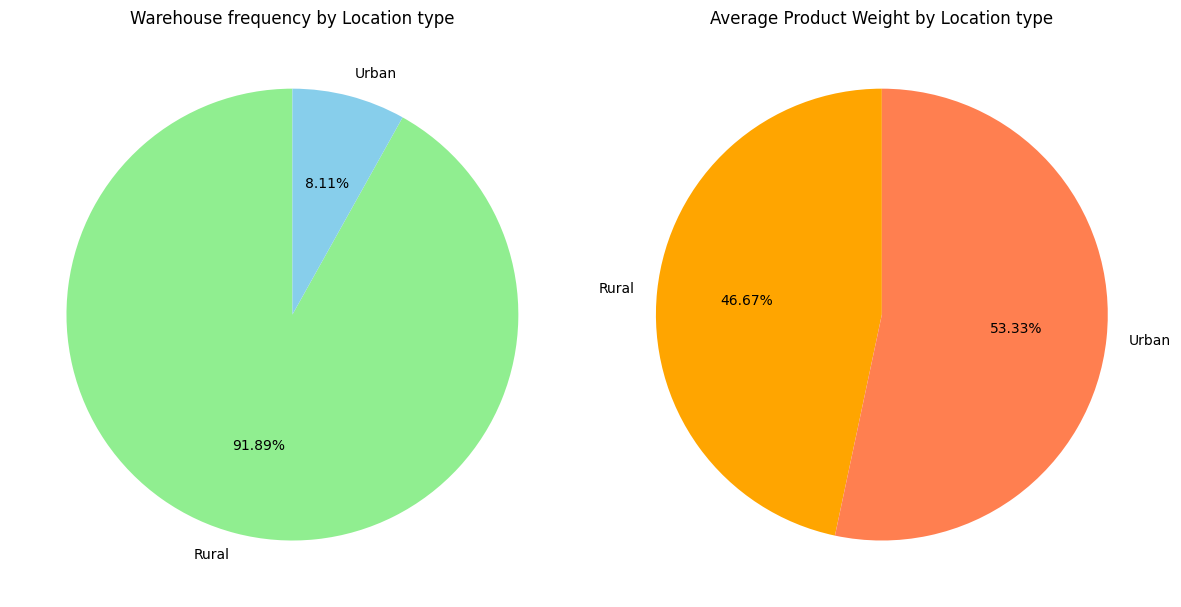

In [119]:
# Get labels, total counts, and mean product weights by zone
labels = ['Rural', 'Urban']
total_count = df_train['Location_type'].value_counts().tolist()

# colors for the pie charts
colors_frq = ['lightgreen', 'skyblue']
colors_pro = ['orange', 'coral']

mean_size = df_train.groupby('Location_type')['product_wg_ton'].mean().to_list()

# Set the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for frequency
axes[0].pie(total_count, colors=colors_frq, labels=labels, autopct='%.2f%%', startangle=90)
axes[0].set_title('Warehouse frequency by Location type', fontsize=12)

# Pie chart for average product weight
axes[1].pie(mean_size, colors=colors_pro, labels=labels, autopct='%.2f%%', startangle=90)
axes[1].set_title('Average Product Weight by Location type', fontsize=12)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [120]:
#  creates two pie charts side by side to visualize warehouse frequency and average product weight by zone.

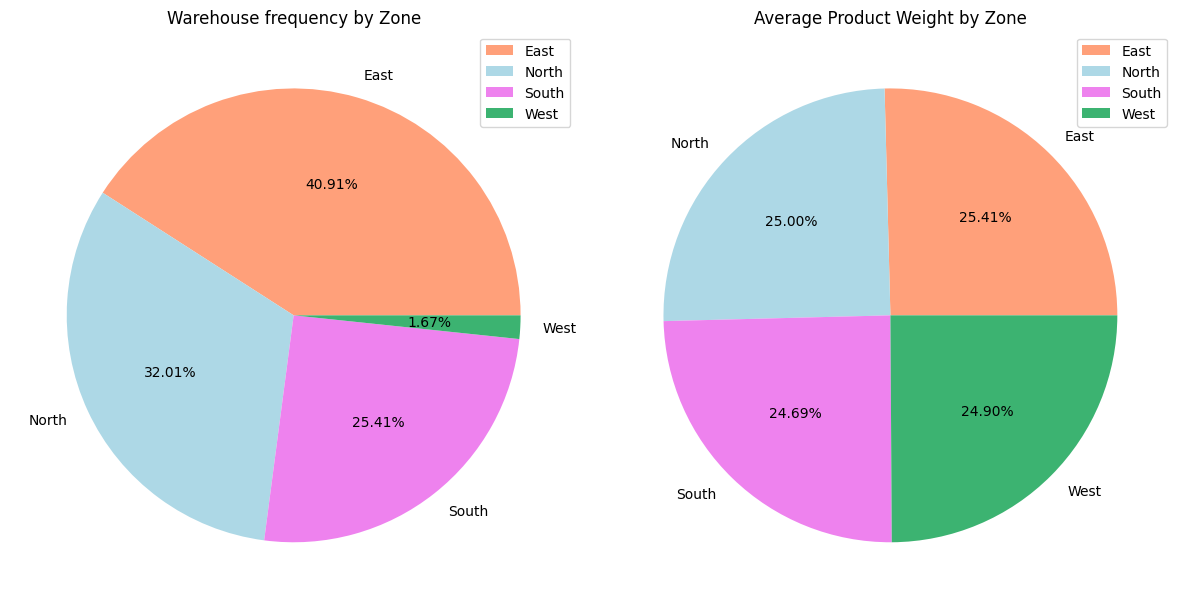

In [121]:
import matplotlib.pyplot as plt


# Get labels, total counts, and mean product weights by zone
labels = ['East', 'North', 'South', 'West']
total_count = df_train['zone'].value_counts().tolist()
colors = ['lightsalmon', 'lightblue', 'violet', 'mediumseagreen']
size_mean = df_train.groupby('zone')['product_wg_ton'].mean().tolist()

# Set the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for frequency
axes[0].pie(total_count, colors=colors, labels=labels, autopct='%.2f%%')
axes[0].set_title('Warehouse frequency by Zone', fontsize=12)
axes[0].legend()

# Pie chart for average product weight
axes[1].pie(size_mean, colors=colors, labels=labels, autopct='%.2f%%')
axes[1].set_title('Average Product Weight by Zone', fontsize=12)
axes[1].legend()

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-122-fb7ead4bf255>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df_train, x='product_wg_ton', fill=True, palette='viridis')


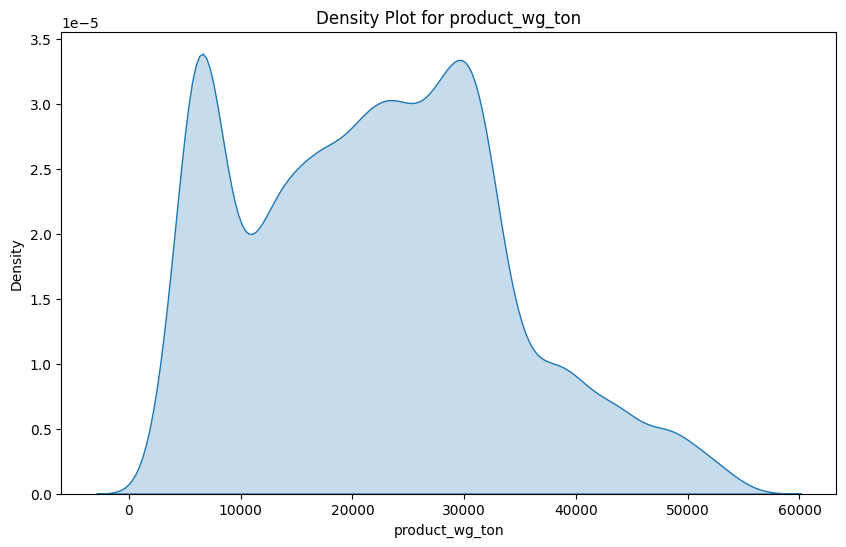

<ipython-input-122-fb7ead4bf255>:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df_train, x=variable, fill=True, palette='viridis')
<ipython-input-122-fb7ead4bf255>:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df_train, x=variable, fill=True, palette='viridis')
<ipython-input-122-fb7ead4bf255>:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df_train, x=variable, fill=True, palette='viridis')
<ipython-input-122-fb7ead4bf255>:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df_train, x=variable, fill=True, palette='viridis')
<ipython-input-122-fb7ead4bf255>:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df_train, x=variable, fill=True, palette='viridis')
<ipython-input-122-fb7ead4bf255>:16: UserWarning: Ignoring `palette` becaus

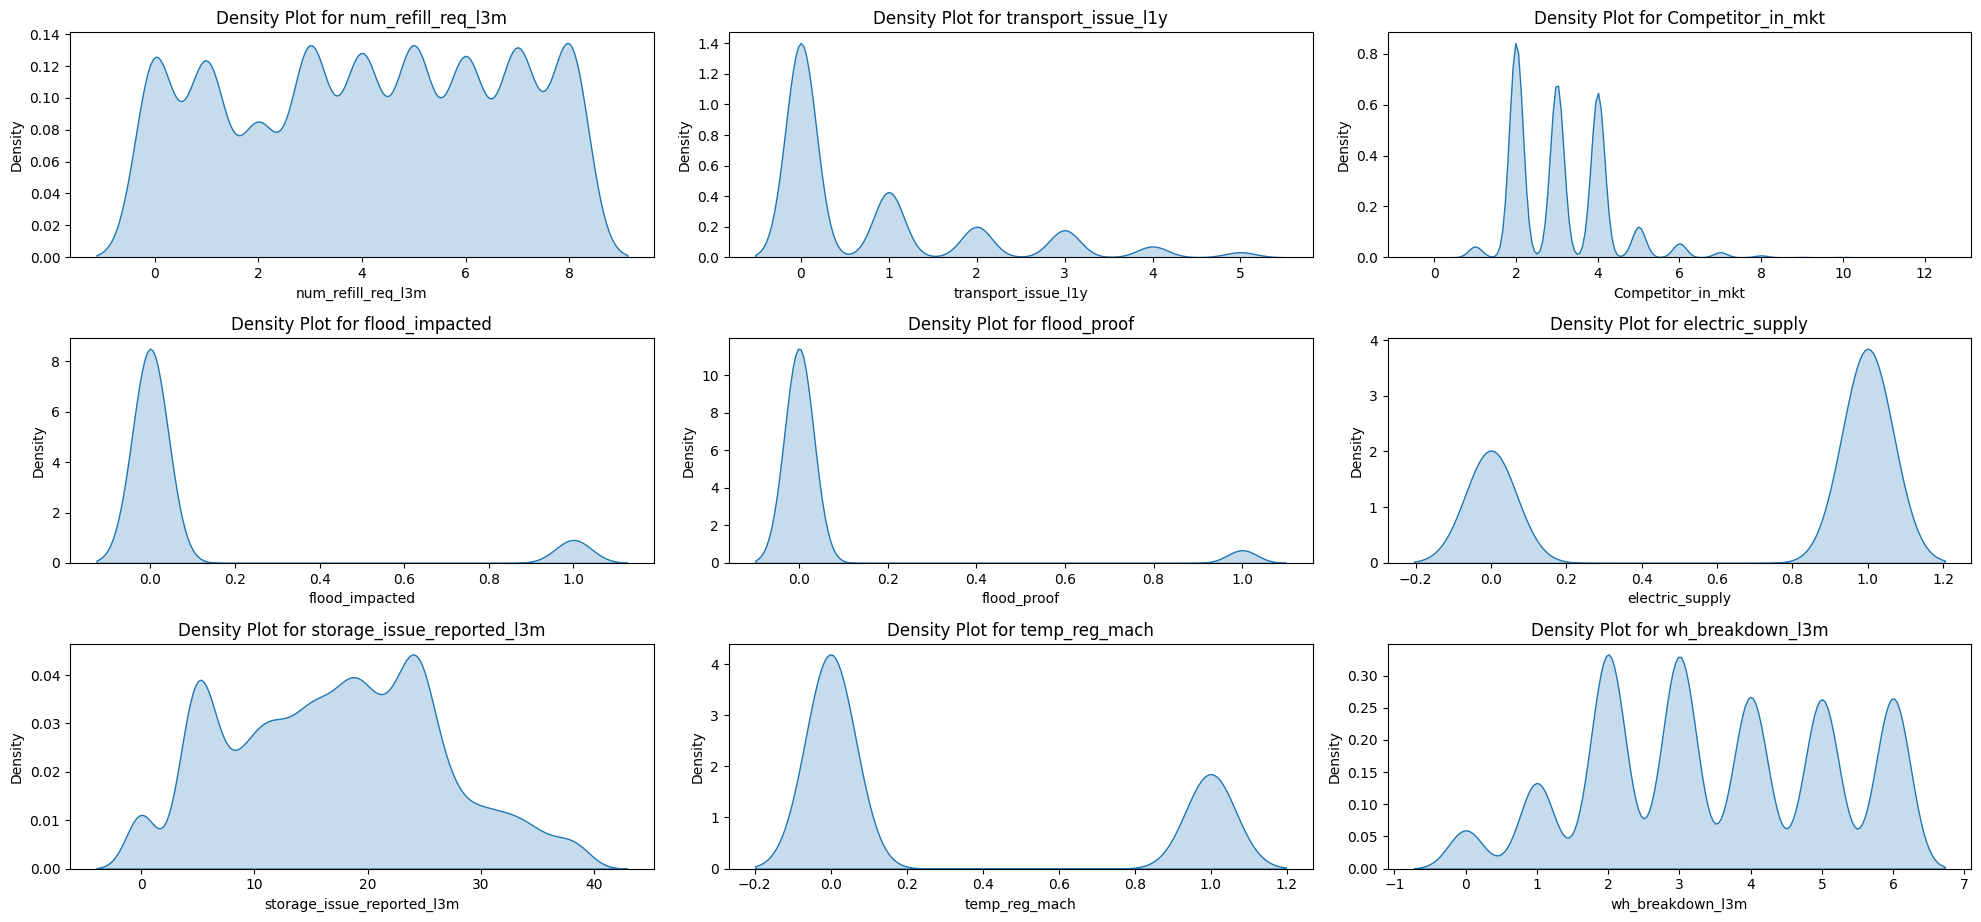

In [122]:
# Density Plot for Dependent Variable 'product_wg_ton'
plt.figure(figsize=(10, 6))
#plot the kde plot
sns.kdeplot(data=df_train, x='product_wg_ton', fill=True, palette='viridis')
plt.title('Density Plot for product_wg_ton')
plt.xlabel('product_wg_ton')
plt.show()

# Density Plots for Independent Variables
numeric_variables = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt','flood_impacted', 'flood_proof', 'electric_supply','storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m']

plt.figure(figsize=(20, 15))
# Loop through  numeric variables
for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(5, 3, i)
    sns.kdeplot(data=df_train, x=variable, fill=True, palette='viridis')
    plt.title(f'Density Plot for {variable}')
    plt.xlabel(variable)

# Adjust layout for better visualization
plt.tight_layout()

#show the plot
plt.show()

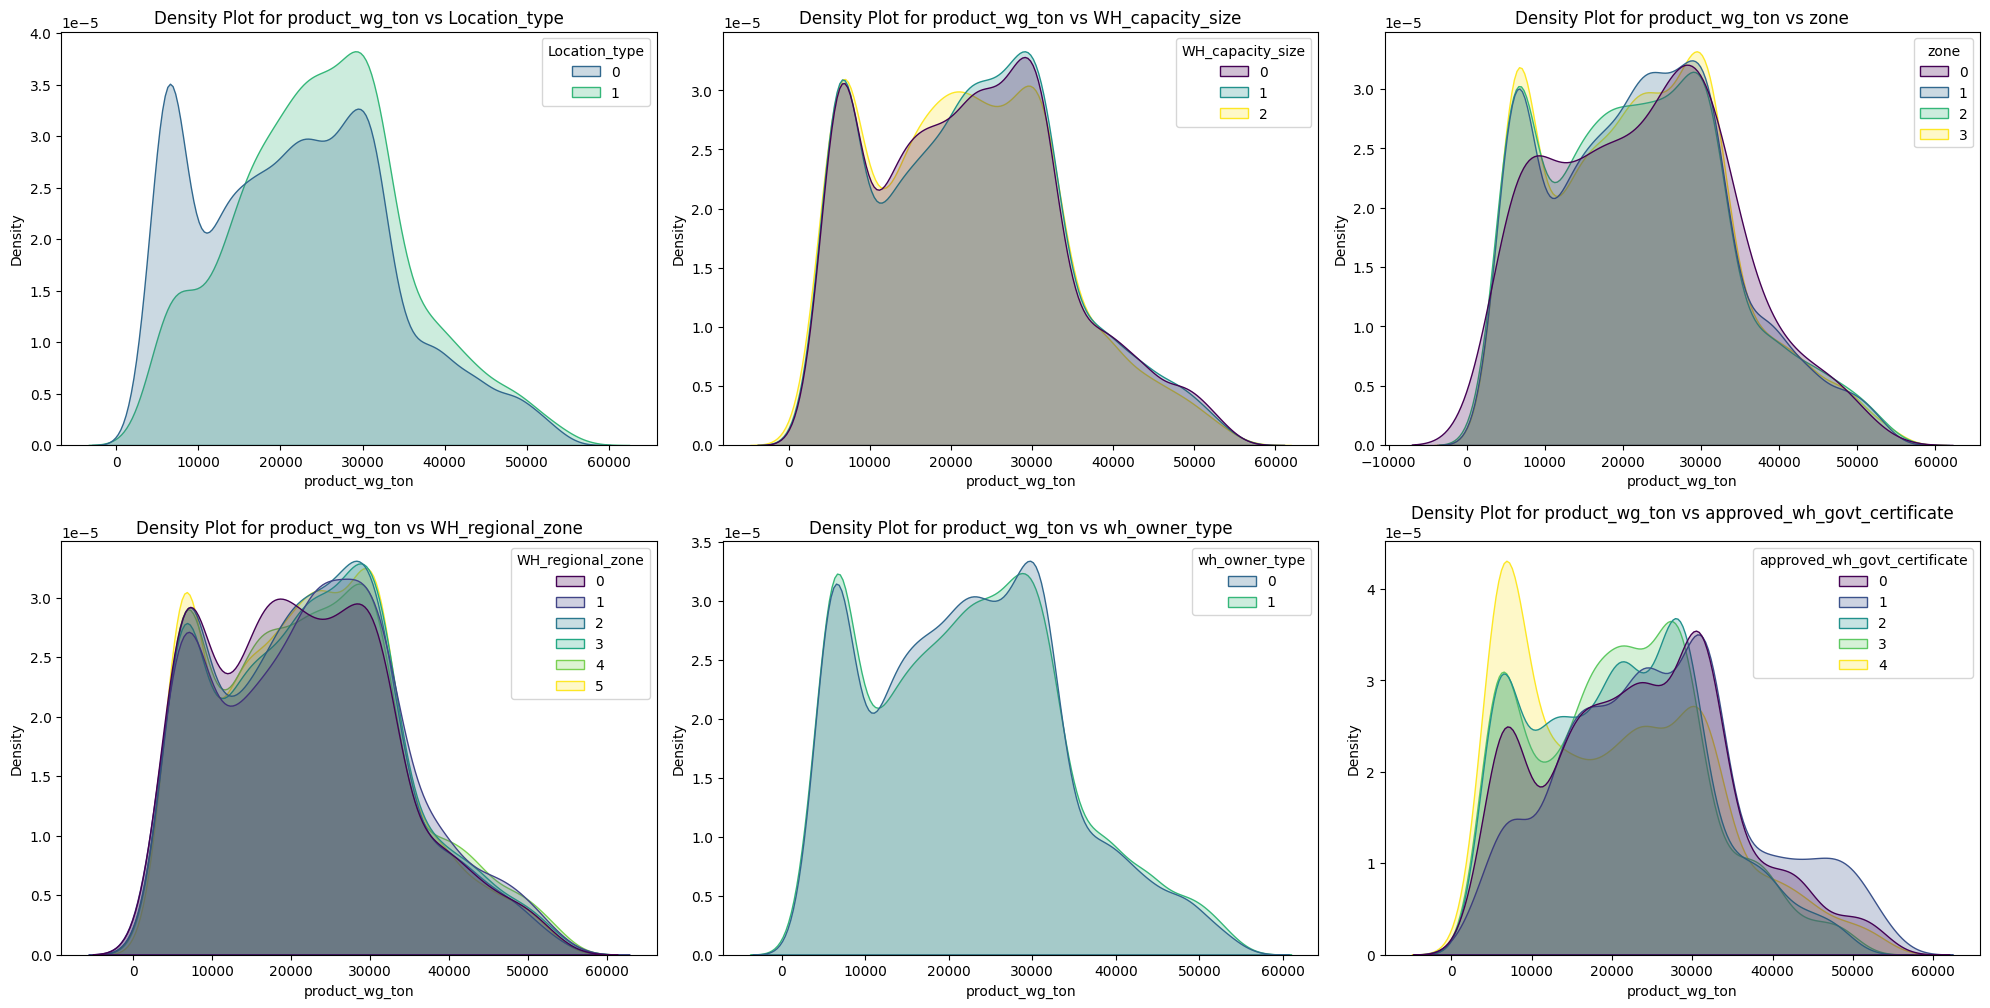

In [123]:
# List of Categorical Variables
categorical_variables = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']

# Create Subplots for Density Plots of Categorical Variables
plt.figure(figsize=(20, 15))
# Loop through categorical variables
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=df_train, x='product_wg_ton', hue=variable, fill=True, common_norm=False, palette='viridis')
    plt.title(f'Density Plot for product_wg_ton vs {variable}')
    plt.xlabel('product_wg_ton')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-124-a2305b71e774>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='product_wg_ton', data=df_train, palette=palette)
<ipython-input-124-a2305b71e774>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='product_wg_ton', data=df_train, palette=palette)
<ipython-input-124-a2305b71e774>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='product_wg_ton', data=df_train, palette=palette)
<ipython-input-124-a2305b71e774>:17: FutureWarning: 

Passing `palette` without assigning `hue` is depreca

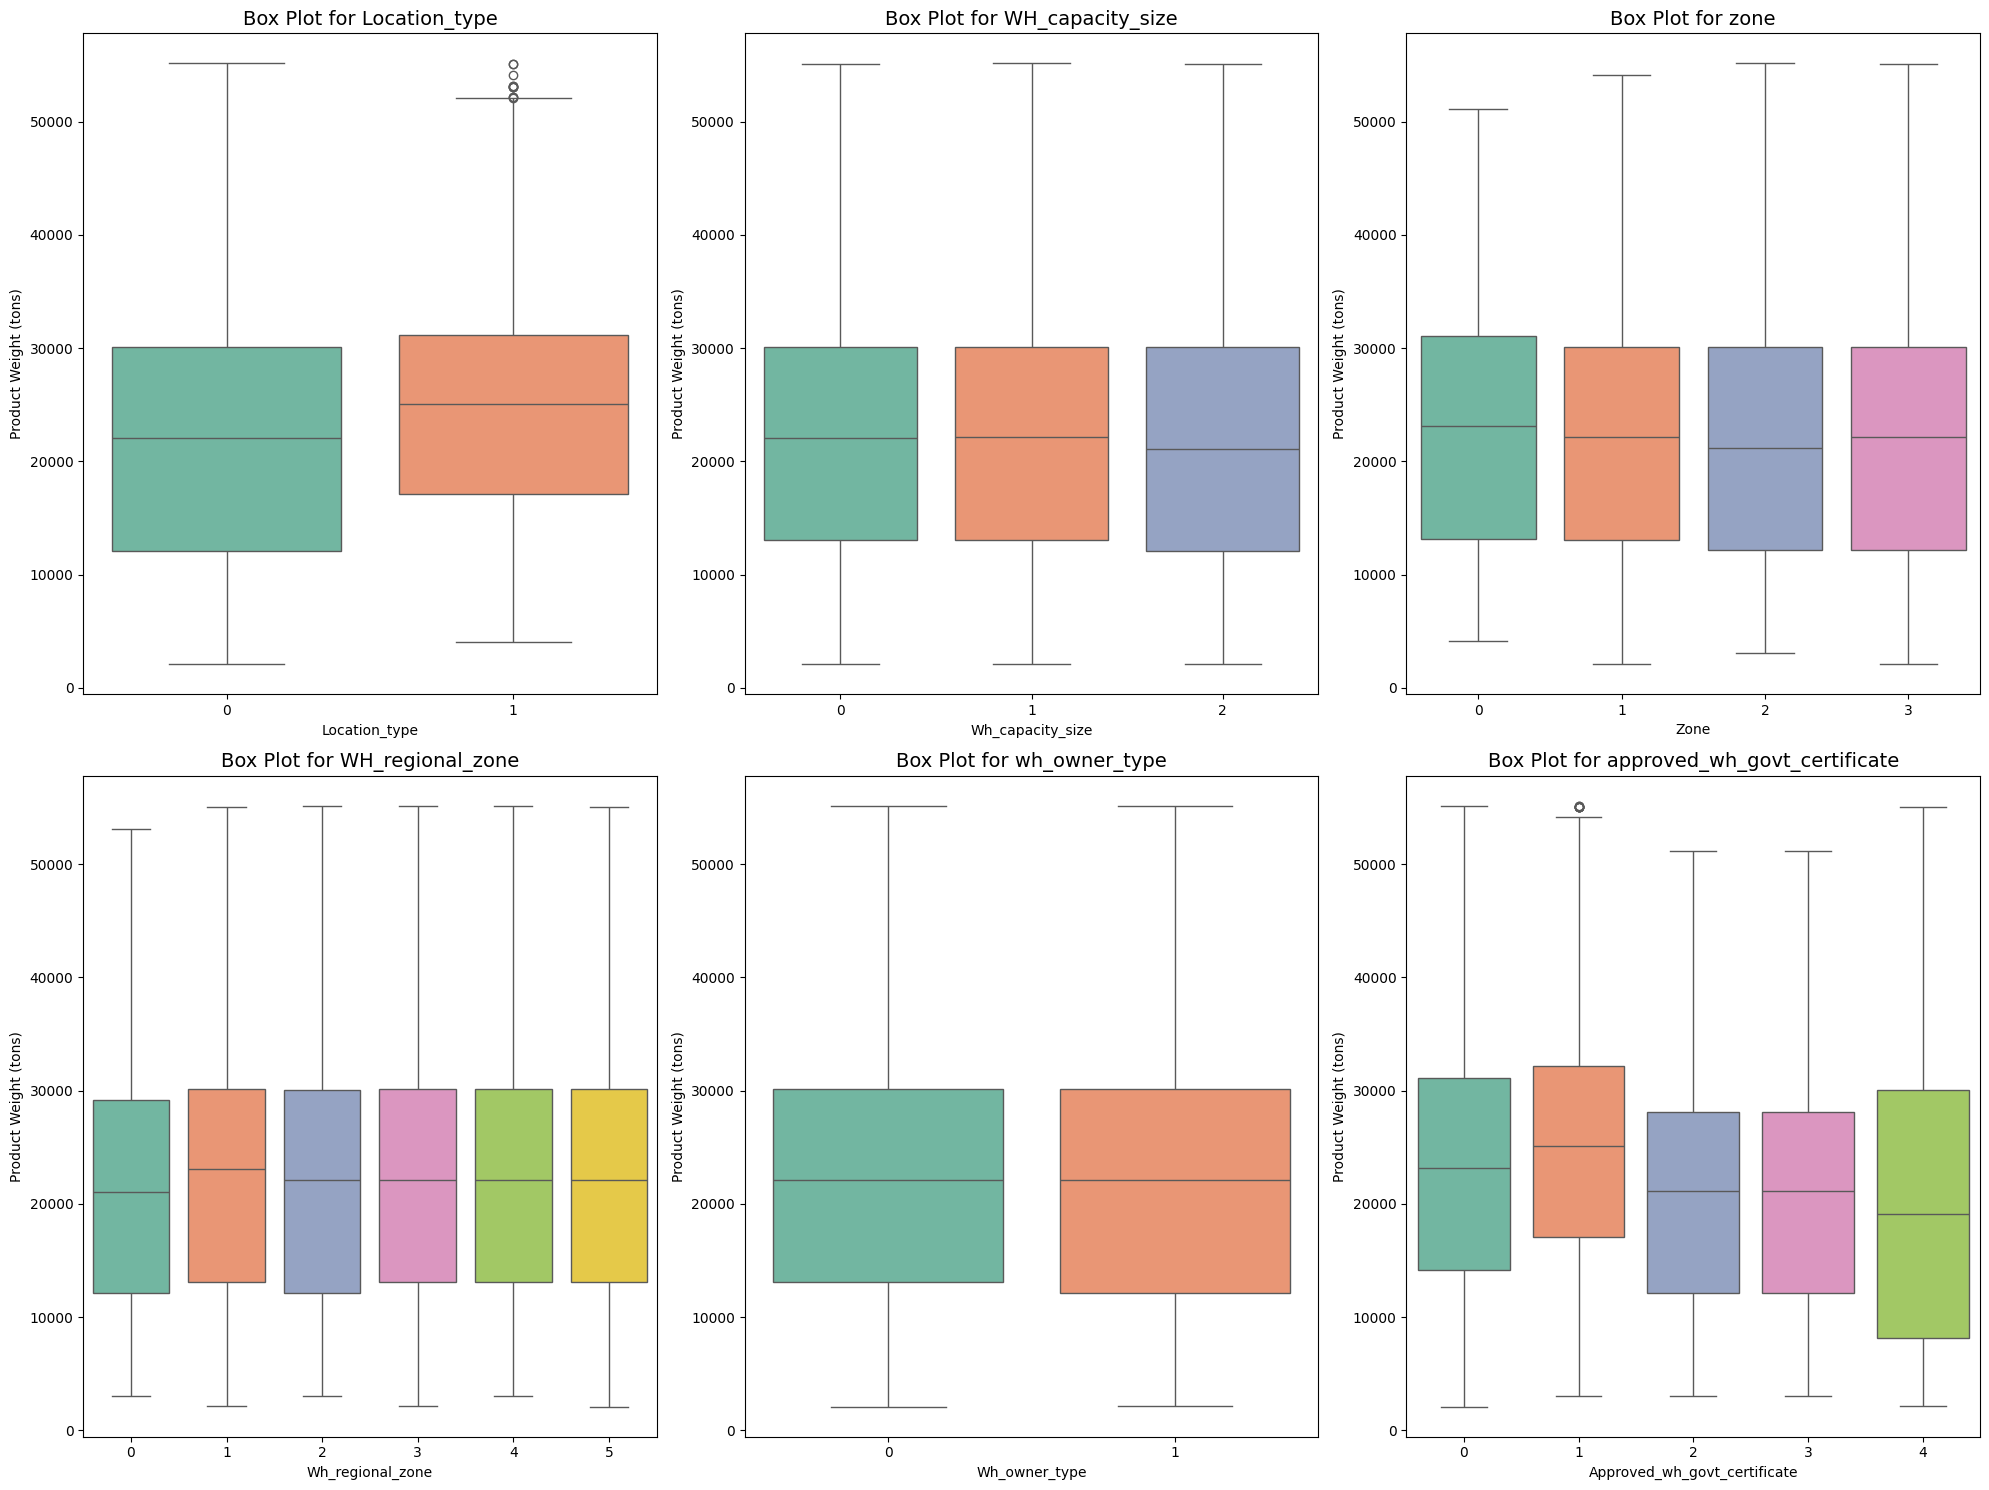

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette (you can choose a different Seaborn color palette)
palette = 'Set2'

categorical_variables = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type',
                          'approved_wh_govt_certificate']

plt.figure(figsize=(20, 15))

# Loop through categorical variables
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(2, 3, i)

    # Use Seaborn's boxplot with a specified color palette
    sns.boxplot(x=variable, y='product_wg_ton', data=df_train, palette=palette)

    # Add labels and title
    plt.xlabel(variable.capitalize())  # Capitalize the variable name for better readability
    plt.ylabel('Product Weight (tons)')
    plt.title(f'Box Plot for {variable}', fontsize=14)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

#**Feature Selection**

##Feature Selection with SelectkBest

In [125]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

In [126]:
#seperate features (x) and target variable(y)
x = df_train.drop(columns=['product_wg_ton'])  # features
y = df_train['product_wg_ton']  #target variable

In [127]:
print(x)

       Location_type  WH_capacity_size  zone  WH_regional_zone  \
0                  1                 2     3                 5   
1                  0                 0     1                 4   
2                  0                 1     2                 1   
3                  0                 1     1                 2   
4                  0                 0     1                 4   
...              ...               ...   ...               ...   
16615              1                 0     3                 5   
16616              1                 0     1                 4   
16617              0                 0     1                 5   
16618              0                 2     3                 5   
16619              0                 0     3                 4   

       num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                       3                    1                  2   
1                       0                    0                  4   


In [128]:
#split the data into train and test set
x_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [129]:
# Initialize SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_regression, k=5)
x_selected = selector.fit_transform(x_train,y_train)

In [130]:
# Get indices of selected features
selected_indices = selector.get_support(indices=True)

In [131]:
# Get the names of selected features
selected_features = x.columns[selected_indices]
print("Selected features", selected_features)

Selected features Index(['transport_issue_l1y', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m'],
      dtype='object')


##Feature Selection with Random Forest

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

import numpy as np


In [133]:
#split the data into train and test set
x_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [134]:
# initialize and train Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [135]:
#Extract feature importance
feature_importance = rf.feature_importances_

In [136]:
# sort feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]

In [137]:
# Get the names of selected features
print("Feature Importances:")
for idx in sorted_indices:
    print(f"{x_train.columns[idx]}: {feature_importance[idx]}")

Feature Importances:
storage_issue_reported_l3m: 0.982600531152167
approved_wh_govt_certificate: 0.009195859483125667
transport_issue_l1y: 0.0010444726554297201
retail_shop_num: 0.0009202169177910227
temp_reg_mach: 0.0009033176123099273
dist_from_hub: 0.0008557782490862116
distributor_num: 0.0007677132736610497
workers_num: 0.0006907686245477888
num_refill_req_l3m: 0.0006225705020635499
govt_check_l3m: 0.000609072449696373
wh_breakdown_l3m: 0.0004334444139924795
Competitor_in_mkt: 0.0003113659816418918
WH_regional_zone: 0.000291539268575681
zone: 0.0002171892022509302
WH_capacity_size: 0.00014641332748141156
wh_owner_type: 0.00011263662312617266
electric_supply: 9.420699388760604e-05
flood_impacted: 8.293431557036369e-05
Location_type: 5.711676517969151e-05
flood_proof: 4.285218841569416e-05


## Fit the Model & Predict , check the R2-Score

##**Model Building**

In [138]:
# import several modules and classes from the 'sklearn' library
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [145]:
# Function to create and display scatter plot for each model
def scatter_plot(model_name, actual_values, predicted_values):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=actual_values, y=predicted_values)
    plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--', lw=2)
    plt.xlabel('Actual Product Weight')
    plt.ylabel('Predicted Product Weight')
    plt.title(f'Actual vs Predicted Product Weight - {model_name}')
    plt.show()

👉Splitting the dataset into the Training set and Test set

In [146]:
#split the data into train and test set
x_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [147]:
X_train = df_train.drop('product_wg_ton', axis=1)
y_train = df_train['product_wg_ton']

X_test = df_test.drop('product_wg_ton', axis=1)
y_test = df_test['product_wg_ton']


In [148]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(5529, 20)
(5529,)
(16620, 20)
(16620,)


In [149]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 1. Linear Regression :

Mean Squared Error(MSE): 2979429.4060810246
Root Mean Squared Error(RMSE): 1726.1023741600684
R-squared score(R2) : 0.9780275953505319


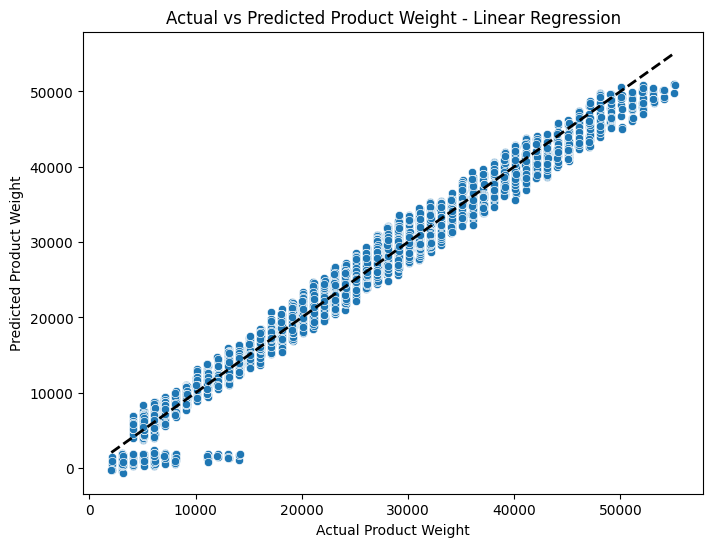

In [150]:
# creating the model
model=LinearRegression()
# feeding the training data to the model
model.fit(X_train,y_train)

# predicting the test set results(lr_pred:linear regression prediction)
lr_pred=model.predict(X_test)
# calculating the mean squared error
lr_mse=mean_squared_error(y_test,lr_pred)
print("Mean Squared Error(MSE):",lr_mse)
# Calculating the root mean squared error
lr_rmse=np.sqrt(lr_mse)
print("Root Mean Squared Error(RMSE):",lr_rmse)
# Calculating the r2 score
lr_r2=r2_score(y_test,lr_pred)
print('R-squared score(R2) :', lr_r2)
# Scatter plot for Linear Regression model
scatter_plot('Linear Regression', y_test, lr_pred)

# 2. Support Vector Machine(SVR) :


Mean Squared Error(MSE):  3129818.0426335884
Root Mean Squared Error(RMSE):  1769.129176355867
R-squared score(R2): 0.9769185239389823


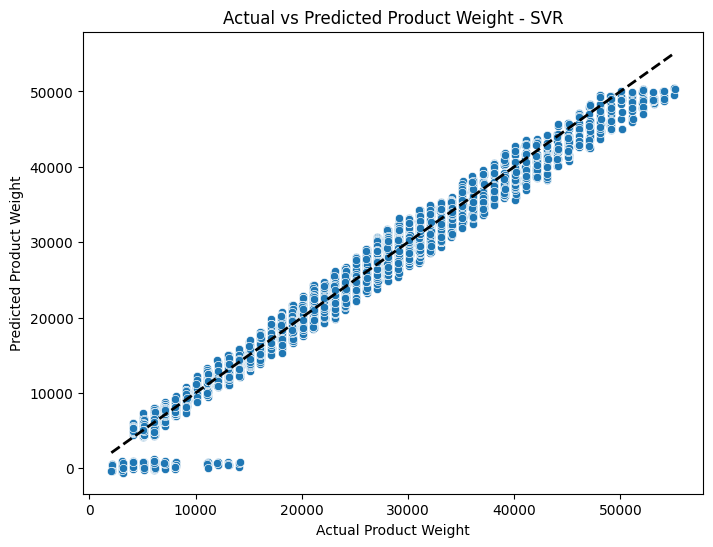

In [151]:
# creating the model
model = SVR(kernel='linear')

# feeding the training data to the model
model.fit(X_train, y_train)

# predicting the test set results(svr_pred:svr prediction)
svr_pred = model.predict(X_test)

# calculating the mean squared error
svr_mse = mean_squared_error(y_test, svr_pred)
print('Mean Squared Error(MSE): ', svr_mse)

# Calculating the root mean squared error
rmse = np.sqrt(svr_mse)
print('Root Mean Squared Error(RMSE): ', rmse)

# Calculating the r2 score
svr_r2 = r2_score(y_test, svr_pred)
print('R-squared score(R2):', svr_r2)

# Scatter plot for SVR model
scatter_plot('SVR', y_test, svr_pred)

# 3. Decision Tree :

Mean Squared Error(MSE):  1766503.1023693255
Root Mean Squared Error(RMSE):  1329.0986052093072
R-squared score(R2) : 0.9869725656528128


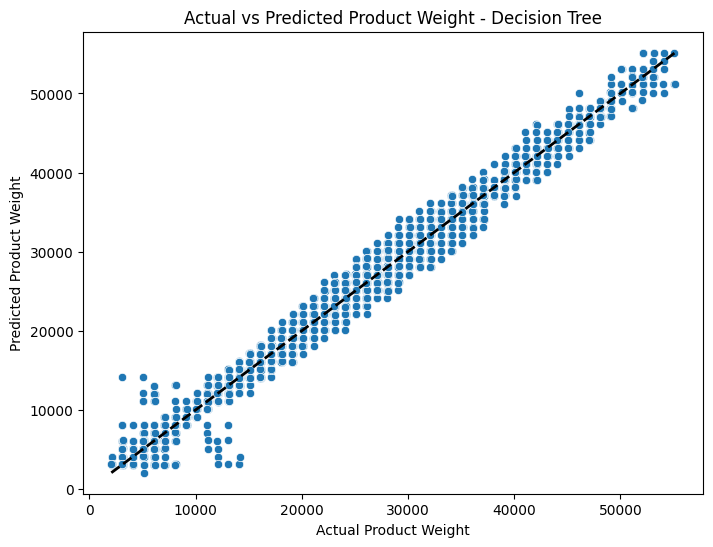

In [152]:
# creating the model
model = DecisionTreeRegressor(random_state=42)

# feeding the training data to the model
model.fit(X_train, y_train)

# predicting the test set results(dt_pred:decision tree prediction)
dt_pred = model.predict(X_test)

# calculating the mean squared error
dt_mse = mean_squared_error(y_test, dt_pred)
print('Mean Squared Error(MSE): ', dt_mse)

# Calculating the root mean squared error
dt_rmse = np.sqrt(dt_mse)
print('Root Mean Squared Error(RMSE): ', dt_rmse)

# Calculating the r2 score
dt_r2 = r2_score(y_test, dt_pred)
print('R-squared score(R2) :', dt_r2)

# Scatter plot for Decision Tree model
scatter_plot('Decision Tree', y_test, dt_pred)

#4. Random Forest :

Mean Squared Error(MSE):  901753.022336607
Root Mean Squared Error(RMSE):  949.6067724782754
R-squared score(R2): 0.9933498399860654


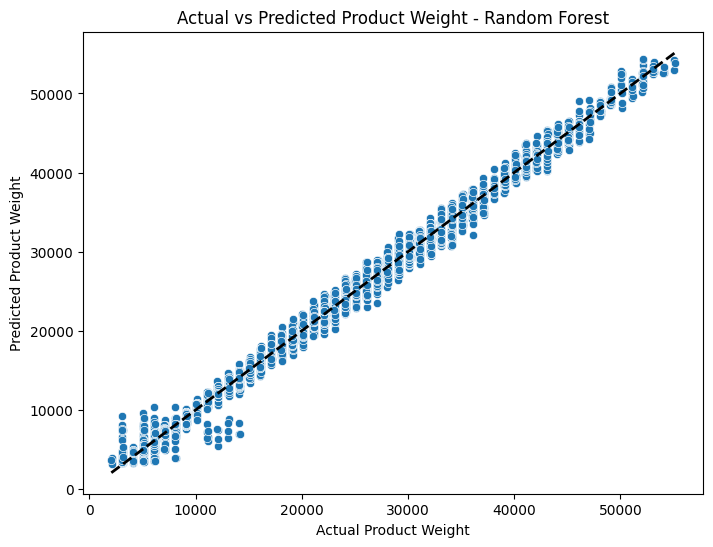

In [153]:
# creating the model
#rfrmodel = RandomForestRegressor()
model = RandomForestRegressor(random_state=42)

# feeding the training data to the model
model.fit(X_train, y_train)

# predicting the test set results(rf_pred:random forest prediction)
rf_pred = model.predict(X_test)

# calculating the mean squared error
rf_MSE = mean_squared_error(y_test, rf_pred)
print('Mean Squared Error(MSE): ', rf_MSE)

# Calculating the root mean squared error
rf_RMSE = np.sqrt(rf_MSE)
print('Root Mean Squared Error(RMSE): ', rf_RMSE)

# Calculating the r2 score
rf_R2 = r2_score(y_test, rf_pred)
print('R-squared score(R2):', rf_R2)

# Scatter plot for Random Forest model
scatter_plot('Random Forest', y_test, rf_pred)

# 5. Neural Network (MLP) :

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error(MSE):  2470760.6791629884
Root Mean Squared Error(RMSE):  1571.8653502011514
R-squared score(R2): 0.9817788757391732


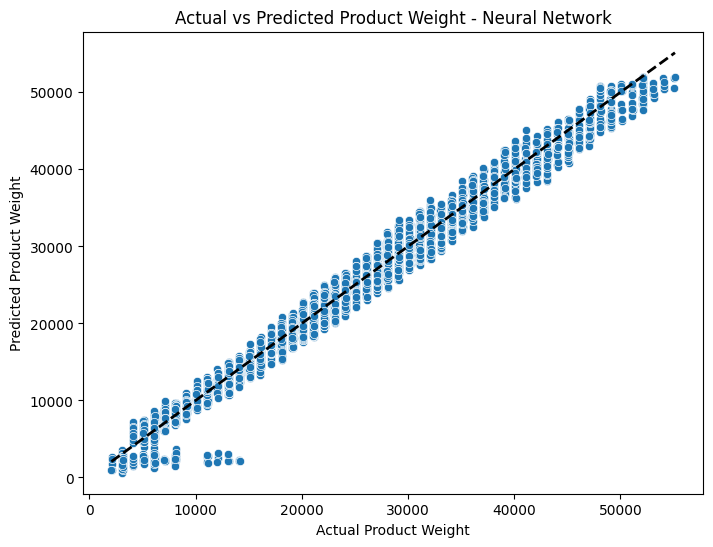

In [154]:

from sklearn.neural_network import MLPRegressor

# Initialize the MLP regressor with desired parameters
model = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', random_state=42)

# Feeding the training data to the model
model.fit(X_train, y_train)

# Predicting the test set results(nn_pred:neural network prediction)
nn_pred = model.predict(X_test)

# Calculating the mean squared error
nn_MSE = mean_squared_error(y_test, nn_pred)
print('Mean Squared Error(MSE): ', nn_MSE)

# Calculating the root mean squared error
nn_RMSE = np.sqrt(nn_MSE)
print('Root Mean Squared Error(RMSE): ', nn_RMSE)

# Calculating the r2 score
nn_R2 = r2_score(y_test, nn_pred)
print('R-squared score(R2):', nn_R2)

# Scatter plot for Random Forest model
scatter_plot('Neural Network', y_test, nn_pred)

# 6.Extreme Gradient Boosting (XGBoost) :

Mean Squared Error(MSE):  905014.3535527284
Root Mean Squared Error(RMSE):  951.3224235519357
R-squared score(R2): 0.9933257886395123


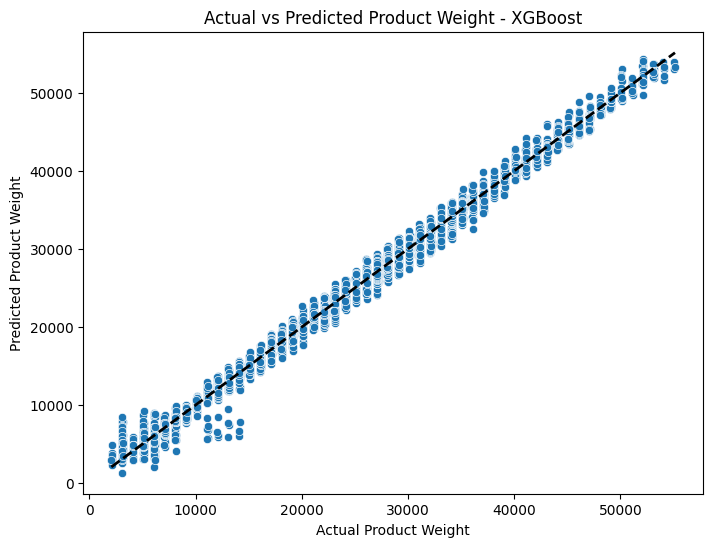

In [155]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# creating the model
model = xgb.XGBRegressor()

# feeding the training data to the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# calculating the mean squared error
xg_mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error(MSE): ', xg_mse)

# Calculating the root mean squared error
rmse = np.sqrt(xg_mse)
print('Root Mean Squared Error(RMSE): ', rmse)

# Calculating the r2 score
xg_r2 = r2_score(y_test, y_pred)
print('R-squared score(R2):', xg_r2)

# Scatter plot for Random Forest model
scatter_plot('XGBoost', y_test, y_pred)

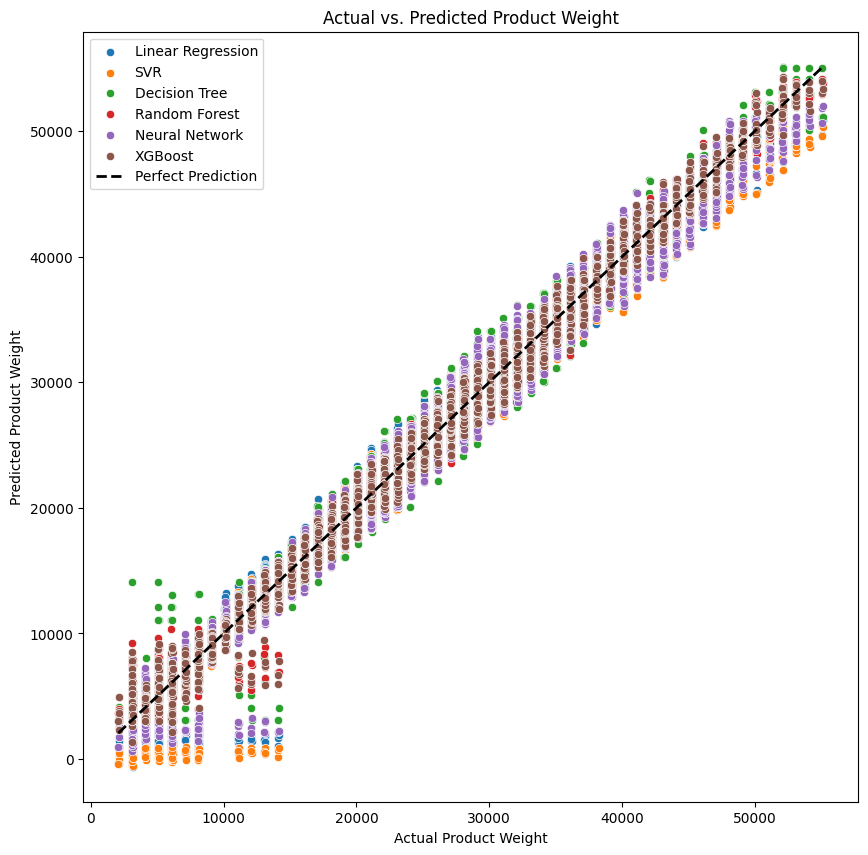

In [156]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store actual vs predicted values for each model
result_df = pd.DataFrame({'Actual': y_test,
                            'Linear Regression': lr_pred,
                            'SVR': svr_pred,
                            'Decision Tree': dt_pred,
                            'Random Forest': rf_pred,
                            'Neural Network': nn_pred,
                            'XGBoost': y_pred})

# Scatter plots for each model
plt.figure(figsize=(10, 10))

for model in result_df.columns[1:]:
    sns.scatterplot(x='Actual', y=model, data=result_df, label=model)

plt.plot([result_df['Actual'].min(), result_df['Actual'].max()],
         [result_df['Actual'].min(), result_df['Actual'].max()],
         'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Product Weight')
plt.ylabel('Predicted Product Weight')
plt.title('Actual vs. Predicted Product Weight')
plt.legend()
plt.show()

###Compare and evaluate the Model results and find the best model

In [157]:
import pandas as pd

# Create a DataFrame to store model names, R2 scores, MSE, and Accuracy Percentage
results_df = pd.DataFrame({
    'Model': ['Linear Regression','SVR','Decision Tree', 'Random Forest' , 'Neural Network', 'XGBoost'],
    'MSE': [lr_mse , svr_mse , dt_mse , rf_MSE , nn_MSE ,xg_mse],
    'R2 Score': [lr_r2,svr_r2 , dt_r2 , rf_R2 ,nn_R2 ,xg_r2]
})

# Calculate the accuracy percentage based on R2 Score
results_df['R2 Score Percentage'] = (results_df['R2 Score'] * 100).round(2)

# Find the best model (lowest MSE)
best_model = results_df.loc[results_df['MSE'].idxmin()]

# Display the results
print("Model Comparison:")
print(results_df)

print("\nBest Model:")
print(f"{best_model['Model']} has the lowest MSE: {best_model['MSE']} and the highest R2 Score: {best_model['R2 Score']}")


Model Comparison:
               Model           MSE  R2 Score  R2 Score Percentage
0  Linear Regression  2.979429e+06  0.978028                97.80
1                SVR  3.129818e+06  0.976919                97.69
2      Decision Tree  1.766503e+06  0.986973                98.70
3      Random Forest  9.017530e+05  0.993350                99.33
4     Neural Network  2.470761e+06  0.981779                98.18
5            XGBoost  9.050144e+05  0.993326                99.33

Best Model:
Random Forest has the lowest MSE: 901753.022336607 and the highest R2 Score: 0.9933498399860654


##**Conclusion**

In this project it provided valuable insights into optimizing the supply quantity for the FMCG company's instant noodles business.  we compared the performance of various machine learning models for predicting a crucial aspect, likely product weights. After training and testing the models, we assessed their performance using two key metrics: Mean Squared Error (MSE) and R-squared (R2) score.Based on these results, the Random Forest model emerged as the best-performing model, exhibiting the lowest MSE and the highest R2 score. Its exceptional performance suggests its suitability for accurately predicting product weights in this supply chain management context.